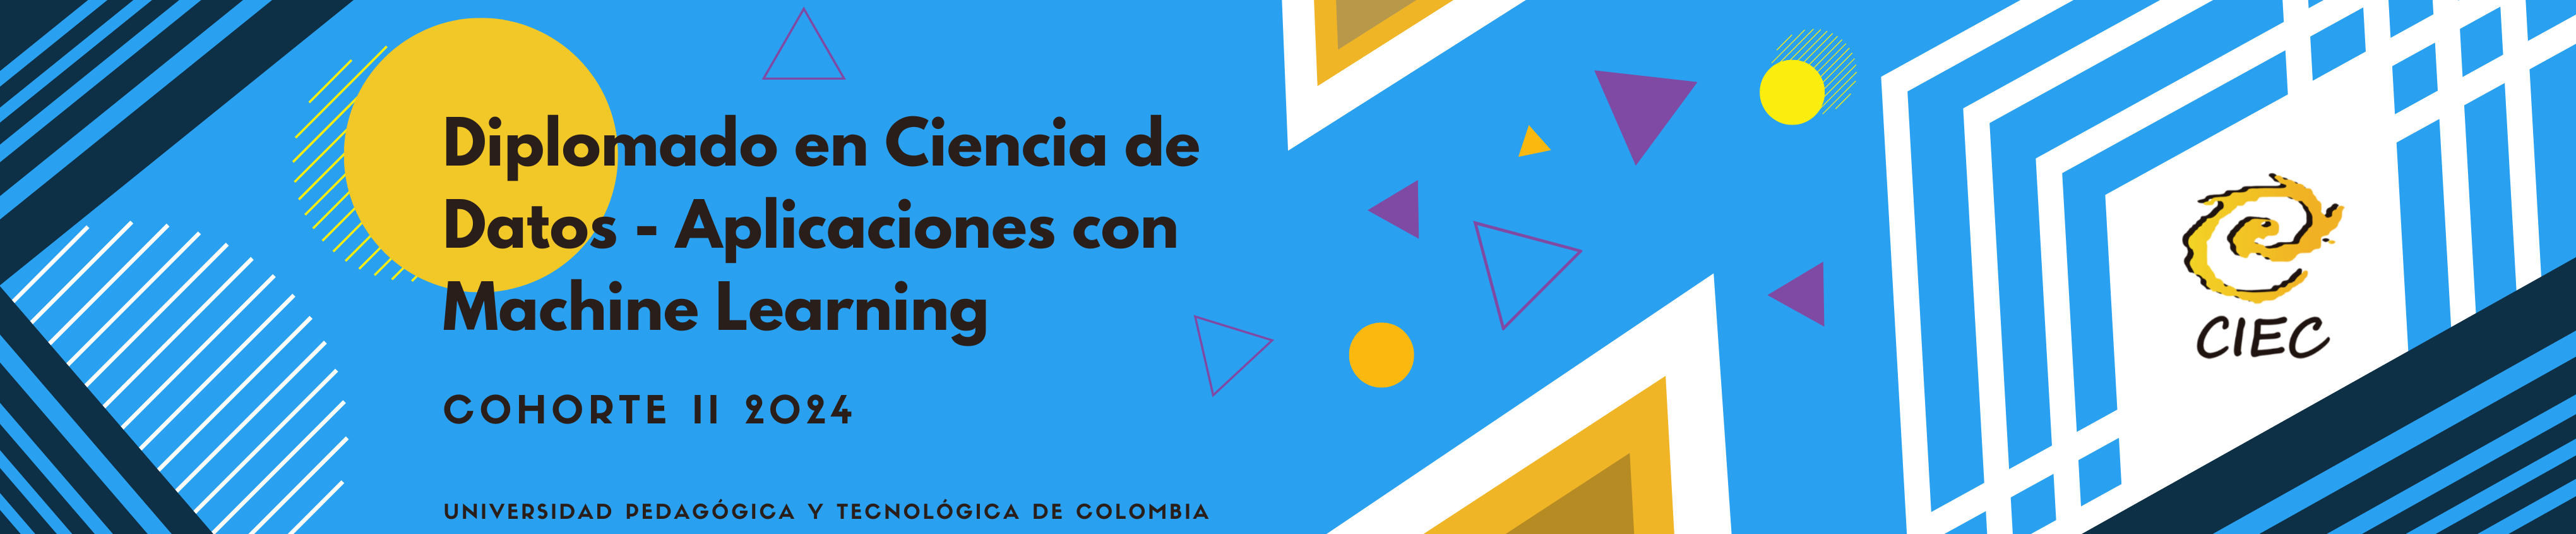

<h1 style="color: #FECB05; text-align: center;"> Redes Neuronales Convolucionales </h1>

<h2 style="color: #007ACC;">Autores</h2>

- [Juan Felipe Contreras Alcívar](https://www.linkedin.com/in/juanf-contreras/)

---

<h2 style="color: #007ACC;">Tabla de contenido</h2>

- [<span style="color: #005C99;">Introducción</span>](#introduction)
- [<span style="color: #005C99;">¿Cómo funcionan las CNNs?</span>](#dim-curse)
- [<span style="color: #005C99;">Técnicas de regularización en las redes neuronales convolucionales</span>](#dim-curse)
- [<span style="color: #005C99;">Ejemplo de detección de malaria </span>](#dim-curse)

---

<h2 style="color: #007ACC;"> Introducción </h2>

Las redes neuronales convolucionales (CNNs, por sus siglas en inglés) son una clase de redes neuronales diseñadas específicamente para procesar datos que tienen una estructura de cuadrícula, como imágenes. Han revolucionado áreas como la visión por computadora, el procesamiento de imágenes médicas y la clasificación de texto, debido a su capacidad para capturar patrones espaciales y características jerárquicas en los datos.

<h2 style="color: #007ACC;"> ¿Cómo funcionan las CNNs? </h2>

A diferencia de las redes neuronales tradicionales, que consideran cada dato de entrada como una unidad independiente, las CNNs explotan las relaciones espaciales entre los datos. Por ejemplo, en una imagen, los píxeles cercanos suelen estar correlacionados y formar patrones como bordes, texturas y formas. Las CNNs aprovechan esta estructura aplicando operaciones de convolución, que son el corazón de estas redes.

<h3 style="color: #007ACC;"> Principales componentes de una CNN </h3>

**Capas de convolución:**

- Estas capas aplican filtros (kernels) a la entrada para extraer características como bordes, colores y texturas.

- Cada filtro escanea la entrada y genera un mapa de características que resalta las propiedades detectadas.

**Capas de activación**:  
   - Después de la convolución, se aplica una función de activación (como ReLU) para introducir no linealidad, lo que permite a la red aprender patrones complejos.

**Capas de agrupamiento (pooling)**:  
   - Estas capas reducen la dimensionalidad de los mapas de características, lo que disminuye el número de parámetros y hace la red más eficiente.  
   - Un ejemplo es el max-pooling, que selecciona el valor máximo de una región en el mapa de características.

**Capas completamente conectadas**:  
   - Al final de la red, estas capas se encargan de tomar las características extraídas y realizar predicciones, como la clasificación de una imagen en categorías.

<img src = "../img/CNN.png">

En una red neuronal convolucional, cada capa convolucional tiene la tarea de extraer características específicas de los datos de entrada, como bordes, texturas o patrones más complejos. El funcionamiento de estas capas se basa en aplicar varias convoluciones con distintos kernel. Este proceso genera un nuevo conjunto de datos denominado mapa de características, que representa las regiones de la entrada donde el filtro detectó un patrón similar al que está diseñado para encontrar. Cada filtro genera un mapa de características distinto, y al combinar varios filtros en una misma capa, la salida de la capa consiste en múltiples mapas de características que capturan distintas propiedades de la entrada.

Un mapa de características es, por tanto, una representación intermedia de los datos después de aplicar un filtro en la capa convolucional. Este mapa resalta las regiones de la entrada donde el filtro detecta un patrón particular, como líneas horizontales, verticales, bordes o texturas. Las dimensiones del mapa de características vienen dadas así:

$$ H_{out} = \frac{H_{in} - F + 2P}{S} + 1, \quad W_{out} = \frac{W_{in} - F + 2P}{S} + 1$$

Donde:
- $H_{in}, W_{in}$: Altura y ancho de la entrada.
- $F$: Tamaño del kernel.
- $P$: Padding aplicado alrededor de la entrada.
- $S$: Stride (paso del kernel).

<h3 style="color: #007ACC;"> ¿Qué Kernel se utilizan en cada capa convolucional? </h3>

Los valores de los kernels no se establecen manualmente, sino que se aprenden automáticamente durante el entrenamiento de la red. Al inicio, los valores de los kernels se inicializan aleatoriamente, y durante el proceso de entrenamiento, se calcula la salida de la red con los kernels actuales y compara la predicción con el valor real mediante una función de pérdida.

<h3 style="color: #007ACC;"> ¿Cuántos parámetros se calculan en una red convolucional? </h3>

Una **capa convolucional** aplica varios filtros a la entrada. Cada filtro tiene su propio conjunto de parámetros, y el número total de parámetros de la capa se calcula como:

$$\text{Total de parámetros} = (\text{Tamaño del kernel} \times \text{Número de canales de entrada} + \text{Bias}) \times \text{Número de filtros}$$

1. **Tamaño del kernel**: Si el kernel tiene tamaño $F \times F$, entonces tiene $F^2$ pesos por canal de entrada.
2. **Número de canales de entrada ($C_{\text{in}}$)**: Si la entrada tiene múltiples canales (como una imagen RGB con 3 canales), cada filtro tiene $F^2 \times C_{\text{in}}$ pesos.
3. **Número de filtros ($K$)**: Una capa puede tener varios filtros; cada filtro genera un mapa de características.
4. **Bias (sesgo)**: Cada filtro tiene un valor adicional de sesgo que también se aprende, sumando un parámetro adicional por filtro.

Finalmente, el total de parámetros se calcula como:

$$\text{Total de parámetros} = (F^2 \times C_{\text{in}} + 1) \times K$$

Supongamos una capa convolucional con las siguientes características:
- **Tamaño del kernel**: $3 \times 3$
- **Número de canales de entrada** ($C_{\text{in}}$): 3 (imagen RGB)
- **Número de filtros** ($K$): 16

El cálculo sería:

1. Parámetros por filtro:
   $$F^2 \times C_{\text{in}} + 1 = (3 \times 3 \times 3) + 1 = 27 + 1 = 28$$
2. Total de parámetros:
   $$\text{Total de parámetros} = 28 \times 16 = 448$$

Por lo tanto, esta capa tiene 448 parámetros a estimar.

<h3 style="color: #007ACC;"> Aplicaciones de las redes neuronales convolucionales </h3>

- **Reconocimiento facial**: Identificación de personas en imágenes o videos.
- **Diagnóstico médico**: Detección de tumores en radiografías o resonancias.
- **Automóviles autónomos**: Análisis de imágenes en tiempo real para identificar señales de tráfico y peatones.
- **Clasificación de imágenes**: Reconocimiento de objetos, animales o paisajes en fotografías.

<h2 style="color: #007ACC;"> Ejemplo: clasificación de imágenes de dígitos</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

In [2]:
# Cargar el conjunto de datos
digits = load_digits()

In [3]:
# Obtener las imágenes y las etiquetas
X = digits.images  # Forma original: (1797, 8, 8)
y = digits.target  # Etiquetas de los dígitos (0 a 9)

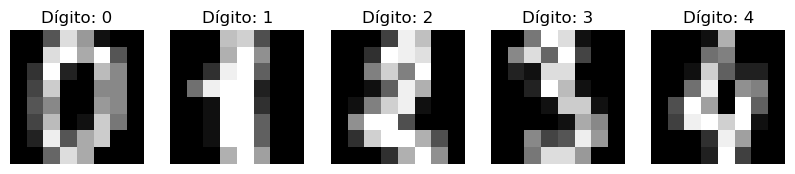

In [4]:
# Mostrar algunas imágenes de ejemplo
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i], cmap='gray')
    ax.set_title(f'Dígito: {y[i]}')
    ax.axis('off')
plt.show()

In [5]:
# Normalizar los valores de los píxeles a [0, 1]
X = X / 16.0  # Los valores originales van de 0 a 16

# Redimensionar las imágenes para agregar la dimensión de canales
X = X.reshape(-1, 8, 8, 1)  # Nueva forma: (1797, 8, 8, 1)

# Convertir las etiquetas a formato categórico (one-hot encoding)
y = to_categorical(y, num_classes=10)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
h = 8 # altura de cada imagen
w = 8 # ancho de cada imagen
c = 1 # número de canales (imágenes en escala de grises, por lo que solo hay un canal)
filters = 32 # cantidad de filtros
s_filters = 3 # tamaño de cada filtro

In [8]:
model = models.Sequential()

# Capa de entrada de convolución
model.add(layers.Conv2D(filters, (s_filters, s_filters), 
                        activation='relu',
                        input_shape=(h, w, c)))

# Capa de agrupamiento (pooling)
model.add(layers.MaxPooling2D((2, 2)))

# Aplanar los mapas de características
model.add(layers.Flatten())

# Capa oculta completamente conectada
model.add(layers.Dense(64, activation='relu'))

# Capa de salida
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 64)                18496     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 19,466
Trainable params: 19,466
Non-trainable params: 0
____________________________________________________

In [11]:
param_l1 = (s_filters**2*c + 1)*filters
print('Número de parámetros de la primera capa convolucional:', param_l1)

Número de parámetros de la primera capa convolucional: 320


In [12]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20


2024-11-18 19:41:42.975438: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


36/36 [==============================] - 0s 5ms/step - loss: 2.1540 - accuracy: 0.3960 - val_loss: 1.9647 - val_accuracy: 0.5139
Epoch 2/20
36/36 [==============================] - 0s 1ms/step - loss: 1.6303 - accuracy: 0.6641 - val_loss: 1.2846 - val_accuracy: 0.8160
Epoch 3/20
36/36 [==============================] - 0s 1ms/step - loss: 0.9492 - accuracy: 0.8703 - val_loss: 0.7085 - val_accuracy: 0.8403
Epoch 4/20
36/36 [==============================] - 0s 1ms/step - loss: 0.5288 - accuracy: 0.9121 - val_loss: 0.4591 - val_accuracy: 0.8854
Epoch 5/20
36/36 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.9339 - val_loss: 0.3536 - val_accuracy: 0.8924
Epoch 6/20
36/36 [==============================] - 0s 1ms/step - loss: 0.2736 - accuracy: 0.9495 - val_loss: 0.2976 - val_accuracy: 0.9236
Epoch 7/20
36/36 [==============================] - 0s 1ms/step - loss: 0.2157 - accuracy: 0.9565 - val_loss: 0.2470 - val_accuracy: 0.9271
Epoch 8/20
36/36 [=============

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")

12/12 [==============================] - 0s 647us/step - loss: 0.0841 - accuracy: 0.9722
Precisión en el conjunto de prueba: 0.9722


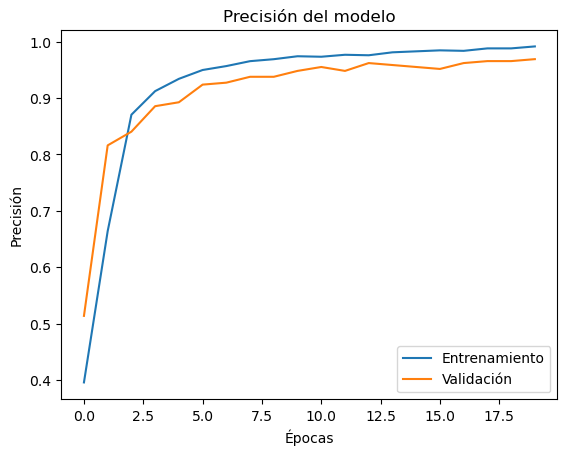

In [14]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

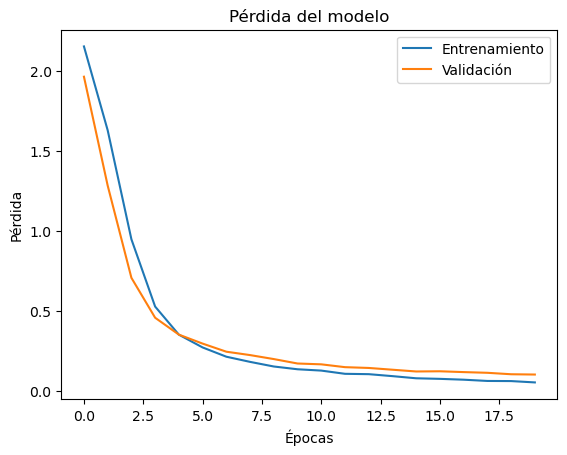

In [15]:
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


1/1 [==============================] - 0s 34ms/step


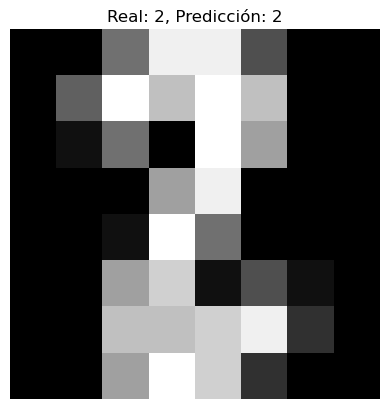

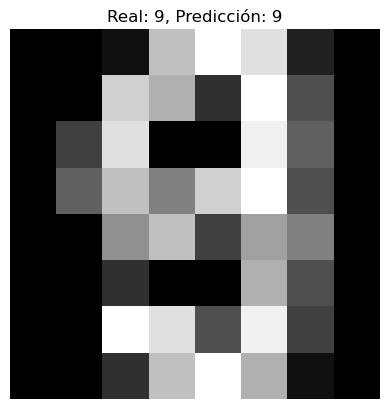

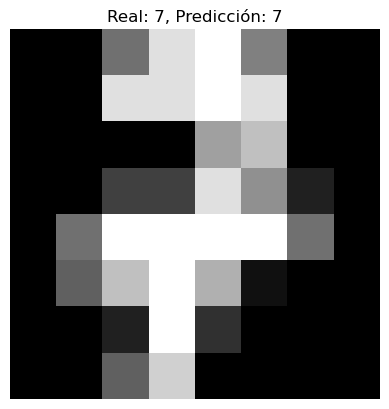

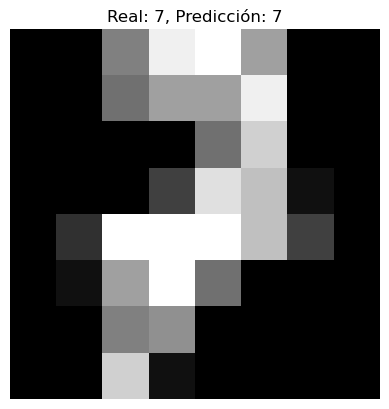

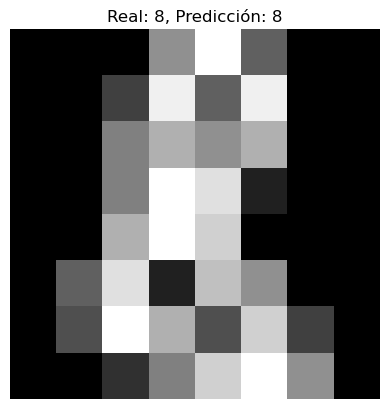

In [16]:
# Seleccionar imágenes de prueba aleatorias
num_images = 5
indices = np.random.choice(len(X_test), num_images, replace=False)
images = X_test[indices]
true_labels = y_test[indices]
predictions = model.predict(images)

# Mostrar las imágenes con sus etiquetas reales y predichas
for i in range(num_images):
    plt.imshow(images[i].reshape(8, 8), cmap='gray')
    plt.title(f"Real: {np.argmax(true_labels[i])}, Predicción: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()

<h2 style="color: #007ACC;"> Técnicas de regularización en las redes neuronales convolucionales </h2>

<h3 style="color: #007ACC;"> Aumentación de datos</h3>

La aumentación de datos amplía el conjunto de datos de entrenamiento mediante transformaciones aleatorias de las imágenes, como rotaciones, volteos, recortes y ajustes de brillo. Estas transformaciones no cambian la etiqueta de la imagen, pero generan ejemplos adicionales, aumentando la variedad del conjunto de datos. en las redes neuronales convolucionales la aumentación de datos introduce variabilidad en los datos, lo que ayuda a que la red sea más robusta y menos propensa a sobreajustarse a patrones específicos.

Dado un conjunto de datos de entrada $\mathcal{D} = \{(x_i, y_i)\}_{i=1}^n$, donde $^{H \times W \times C}$ (imagen con altura $H$, ancho $W$ y $C$ canales) y $y_i$ es la etiqueta correspondiente, la aumentación de datos genera un nuevo conjunto $\mathcal{D} = \{(x_i, y_i)\}_{i=1}^m$, donde $x_i = T(x_i)$ es el resultado de aplicar una transformación $T a $x_i$. 

Las transformaciones \(T\) deben cumplir:
$$P(y_i \mid x_i') = P(y_i \mid x_i)$$

es decir, las transformaciones no deben alterar la relación entre los datos $x_i$ y sus etiquetas $y_i$.

<h4 style="color: #007ACC;"> Rotación </h3>

Sea $x \in \mathbb{R}^{H \times W}$ una imagen de entrada. Una rotación por un ángulo $\theta$ alrededor del centro de la imagen se puede representar como:

$$T_{\text{rot}}(x)(u, v) = x(u', v')$$

donde las coordenadas originales $(u', v')$ se obtienen mediante:

$$\begin{bmatrix}
u' \\
v'
\end{bmatrix}
=
\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
\begin{bmatrix}
u - u_c \\
v - v_c
\end{bmatrix}
+
\begin{bmatrix}
u_c \\
v_c
\end{bmatrix}$$

Aquí, $(u_c, v_c)$ son las coordenadas del centro de la imagen.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [18]:
# Función para rotar una imagen usando la matriz de rotación
def rotate_image(image_array, angle_degrees):

    # Convertir el ángulo de grados a radianes
    angle_radians = np.radians(angle_degrees)
    
    # Crear la matriz de rotación
    rotation_matrix = np.array([
        [np.cos(angle_radians), -np.sin(angle_radians)],
        [np.sin(angle_radians), np.cos(angle_radians)]
    ])
    
    # Obtener las dimensiones de la imagen
    h, w = image_array.shape[:2]
    
    # Crear una nueva matriz para la imagen rotada
    rotated_image = np.zeros_like(image_array)
    
    # Centro de la imagen
    center_x, center_y = w // 2, h // 2
    
    # Recorrer cada píxel de la imagen rotada
    for i in range(h):
        for j in range(w):
            # Coordenadas en el espacio de origen
            original_coords = np.array([j - center_x, i - center_y])
            rotated_coords = np.dot(rotation_matrix, original_coords)
            original_x, original_y = rotated_coords + np.array([center_x, center_y])
            
            # Redondear y verificar si está en el rango válido
            original_x = int(round(original_x))
            original_y = int(round(original_y))
            
            if 0 <= original_x < w and 0 <= original_y < h:
                rotated_image[i, j] = image_array[original_y, original_x]
    
    return rotated_image

In [19]:
# Cargar la imagen
image_path = "../img/mb.webp"  # Cambia esto por la ruta de tu imagen
image = Image.open(image_path)
image_array = np.array(image)

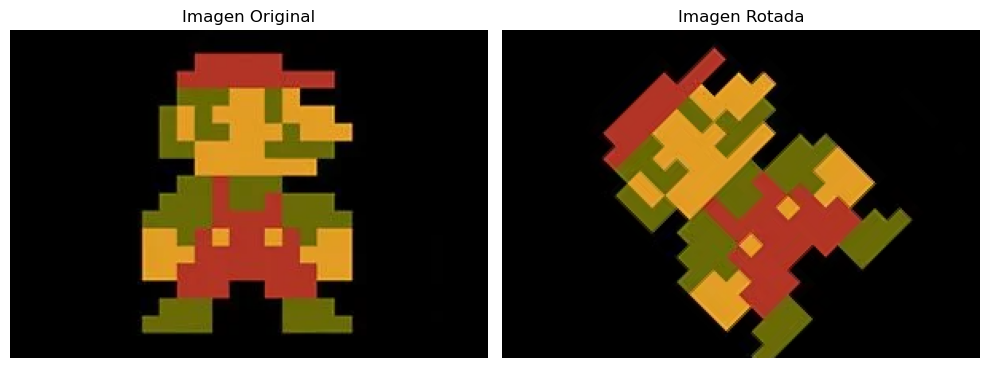

In [20]:
# Rotar la imagen 45 grados
rotated_image_array = rotate_image(image_array, 45)

# Mostrar la imagen original y la rotada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(image_array)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Imagen Rotada")
plt.imshow(rotated_image_array)
plt.axis("off")

plt.tight_layout()
plt.show()

<h4 style="color: #007ACC;"> Traslación </h3>

Una traslación en la imagen por un vector $(t_u, t_v)$ se define como:

$$T_{\text{trans}}(x)(u, v) = x(u - t_u, v - t_v)$$

donde $(t_u, t_v)$ son los desplazamientos en las direcciones horizontal y vertical, respectivamente.

In [21]:
# Función para trasladar una imagen
def translate_image(image_array, tx, ty):

    # Obtener las dimensiones de la imagen
    h, w = image_array.shape[:2]

    # Crear una nueva matriz para la imagen trasladada
    translated_image = np.zeros_like(image_array)

    # Crear la matriz de traslación
    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

    # Recorrer cada píxel de la imagen trasladada
    for i in range(h):
        for j in range(w):
            # Coordenadas homogéneas de la posición en la imagen trasladada
            translated_coords = np.dot(translation_matrix, np.array([j, i, 1]))
            x, y = translated_coords[:2]

            # Verificar si las coordenadas originales están dentro del rango válido
            x = int(round(x))
            y = int(round(y))
            if 0 <= x < w and 0 <= y < h:
                translated_image[i, j] = image_array[y, x]

    return translated_image

In [22]:
# Aplicar una traslación (desplazar 50 píxeles a la derecha y 30 hacia abajo)
tx, ty = 50, 30
translated_image_array = translate_image(image_array, tx, ty)

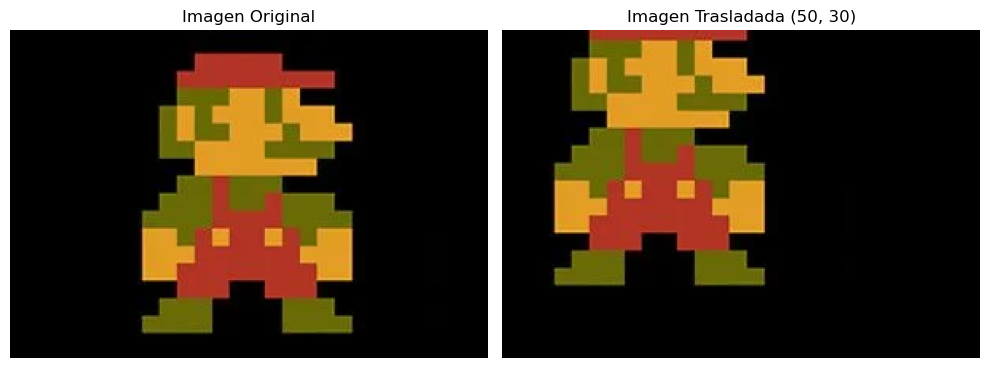

In [23]:
# Mostrar la imagen original y la trasladada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(image_array)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Imagen Trasladada ({tx}, {ty})")
plt.imshow(translated_image_array)
plt.axis("off")

plt.tight_layout()
plt.show()

<h3 style="color: #007ACC;"> Batchnormalization </h3>

Batch normalization normaliza las activaciones de las capas intermedias durante el entrenamiento. Esto estabiliza el aprendizaje y reduce la sensibilidad del modelo a la inicialización de los pesos.

Dado un lote de activaciones $\mathbf{x}$, se calcula

$$\mathbf{\hat{x}} = \frac{ \mathbf{x} - \mu }{\sigma}$$

Donde $\mu$ y $\sigma$ son la media y la desviación estándar del lote.

Batch normalization actúa como una forma de regularización, aunque su principal objetivo es acelerar el entrenamiento.

En redes neuronales profundas, las distribuciones de las activaciones intermedias pueden cambiar durante el entrenamiento, un fenómeno conocido como internal covariate shift. Batch Normalization reduce este cambio, manteniendo las activaciones en un rango controlado en cada iteración. Esto estabiliza el entrenamiento y reduce el número de épocas necesarias para alcanzar una solución óptima.

En modelos sin Batch Normalization, seleccionar la tasa de aprendizaje adecuada es crucial para evitar problemas como oscilaciones o divergencia en el entrenamiento. Batch Normalization suaviza el proceso de optimización, permitiendo usar tasas de aprendizaje más altas y reduciendo la sensibilidad a la elección de este hiperparámetro.

<h2 style="color: #007ACC;"> Ejemplo de detección de malaria </h2>

El conjunto de datos de malaria fue descargado de la Biblioteca Nacional de Medicina (NLM). Este conjunto de datos es fundamental para desarrollar y validar algoritmos de visión por computadora diseñados para identificar con precisión parásitos de la malaria en imágenes de frotis de sangre. Los datos de la NLM garantizan que la investigación se base en información de alta calidad y confiable, lo cual es crucial para mejorar la precisión del diagnóstico y aumentar la efectividad general de los métodos de detección de malaria.

Para este ejercicio, se utiliza una versión modificada de las imágenes originales, se reescalaron por temas de costo computacional y para unificar el tamaño de todas las imágenes. Sin emgargo, las imágenes originales se encuentran en: https://lhncbc.nlm.nih.gov/LHC-downloads/downloads.html#malaria-datasets

In [24]:
import pandas as pd
import os

In [25]:
df = pd.read_csv('../data/meta_data/metadata_resized.csv', sep=';')
df.head()

,name,img_size,min_pixel,max_pixel,train_test,label
0,C118P79ThinF_IMG_20151002_105018_cell_150.png,"(128, 128)",0,222,train,parasitized
1,C13NThinF_IMG_20150614_131318_cell_179.png,"(128, 128)",0,225,train,parasitized
2,C189P150ThinF_IMG_20151203_142224_cell_84.png,"(128, 128)",0,196,train,parasitized
3,C91P52ThinF_IMG_20150821_123116_cell_189.png,"(128, 128)",0,225,train,parasitized
4,C84P45ThinF_IMG_20150818_101226_cell_98.png,"(128, 128)",0,221,train,parasitized


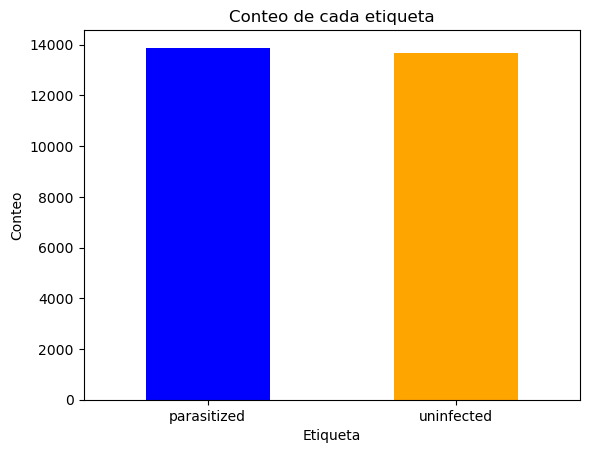

In [26]:
counts = df['label'].value_counts()

counts.plot(kind='bar', color=['blue', 'orange'])

plt.title('Conteo de cada etiqueta')
plt.xlabel('Etiqueta')
plt.ylabel('Conteo')
plt.xticks(rotation=0)
plt.show()

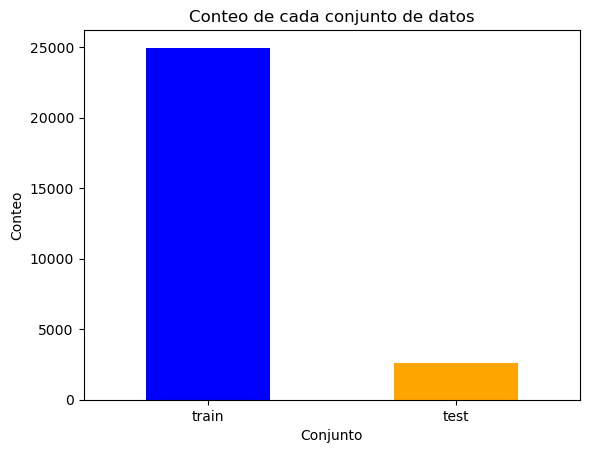

In [27]:
counts = df['train_test'].value_counts()

counts.plot(kind='bar', color=['blue', 'orange'])

plt.title('Conteo de cada conjunto de datos')
plt.xlabel('Conjunto')
plt.ylabel('Conteo')
plt.xticks(rotation=0)
plt.show()

In [28]:
sample_files = df[['name', 'label']].sample(36, random_state=42)

data_dir = '../data/resized'
random_files = []

for file in sample_files.iterrows():
    file_path, label  = os.path.join(data_dir, file[1][0]), file[1][1]
    random_files = random_files + [(file_path, label)]

/var/folders/7v/mlpbd2vj15s13pz4rjm4bq1m0000gn/T/ipykernel_4118/362800321.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file_path, label  = os.path.join(data_dir, file[1][0]), file[1][1]


In [29]:
def display_images(random_files):

    N  = len(random_files)
    if N > 36:
        raise ValueError("N should be 36 or less to fit in a 6x6 grid.")
        
    # Set up the plot
    fig, axes = plt.subplots(6, 6, figsize=(12, 12))
    axes = axes.flatten()

    # Hide any extra subplots
    for ax in axes[N:]:
        ax.axis('off')

    # Display each image
    for ax, image in zip(axes, random_files):
        image_path = image[0]
        label = image[1]
        
        img = Image.open(image_path)
        ax.imshow(img)
        ax.set_title(label, fontsize=8)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

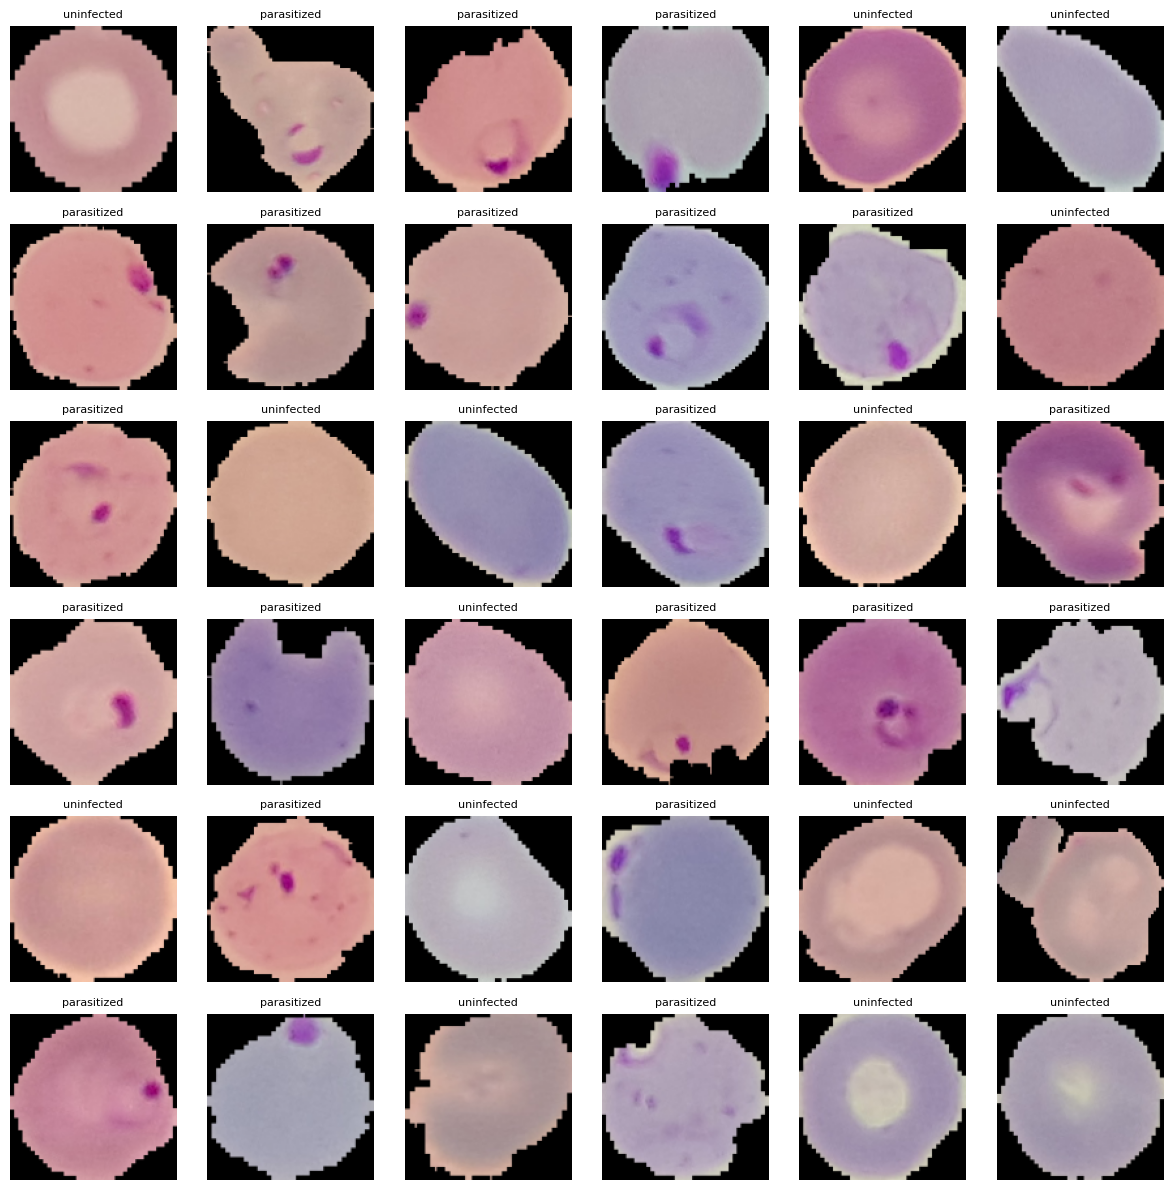

In [30]:
display_images(random_files)

In [31]:
# data handling
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt

# machine learning
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# neural networks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, LeakyReLU
import tensorflow as tf
from keras.regularizers import L2
from keras.callbacks import EarlyStopping

from tensorflow.keras.regularizers import l2

import os
import random
import warnings
import itertools

warnings.filterwarnings('ignore')

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
bat_size = 36
image_size = 128
channels = 3

In [34]:
X_train = df[df['train_test']=='train'][['name', 'label']]
X_test = df[df['train_test']=='test'][['name', 'label']]

In [35]:
X_train, X_val = train_test_split(X_train, test_size=0.2, stratify=X_train['label'], random_state=42)

Para este ejercicio, utilizamos el concepto de dataloader, ya que es ineficiente y computacionalmente costoso administrar todas las imágenes en memoria:

In [36]:
train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory = data_dir,
                                                    x_col= 'name',
                                                    y_col= 'label',
                                                    batch_size = bat_size,
                                                    target_size = (image_size,image_size)
                                                   )

val_generator = test_datagen.flow_from_dataframe(X_val,
                                                 directory = data_dir,
                                                 x_col= 'name',
                                                 y_col= 'label',
                                                 batch_size = bat_size,
                                                 target_size = (image_size,image_size),
                                                 shuffle=False
                                                 )

test_generator = test_datagen.flow_from_dataframe(X_test,
                                                  directory = data_dir,
                                                  x_col= 'name',
                                                  y_col= 'label',
                                                  batch_size = bat_size,
                                                  target_size = (image_size,image_size),
                                                  shuffle=False
                                                 )

Found 19966 validated image filenames belonging to 2 classes.
Found 4992 validated image filenames belonging to 2 classes.
Found 2600 validated image filenames belonging to 2 classes.


In [37]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_history(history):
    # Extract data from the history object
    history_dict = history.history
    
    # Extract metrics from history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    accuracy = history_dict.get('accuracy')
    val_accuracy = history_dict.get('val_accuracy')
    
    epochs = range(1, len(loss) + 1)
    
    # Plot training and validation loss
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [38]:
model = Sequential()

# First Convolutional layer
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(image_size, image_size, channels)))

# Max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layer with 32 nodes
model.add(Dense(32))

model.add(Dense(2, activation='softmax'))

In [39]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                2097184   
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,097,698
Trainable params: 2,097,698
Non-trainable params: 0
____________________________________________

In [41]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

In [42]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 100
                   )

Epoch 1/100
555/555 [==============================] - 23s 42ms/step - loss: 1.3305 - accuracy: 0.6227 - val_loss: 0.7474 - val_accuracy: 0.5976
Epoch 2/100
555/555 [==============================] - 20s 35ms/step - loss: 0.6251 - accuracy: 0.6811 - val_loss: 0.6602 - val_accuracy: 0.6436
Epoch 3/100
555/555 [==============================] - 19s 35ms/step - loss: 0.5565 - accuracy: 0.7195 - val_loss: 0.6195 - val_accuracy: 0.6715
Epoch 4/100
555/555 [==============================] - 19s 35ms/step - loss: 0.5307 - accuracy: 0.7392 - val_loss: 0.6217 - val_accuracy: 0.6703
Epoch 5/100
555/555 [==============================] - 20s 35ms/step - loss: 0.5142 - accuracy: 0.7509 - val_loss: 0.6286 - val_accuracy: 0.6729
Epoch 6/100
555/555 [==============================] - 19s 35ms/step - loss: 0.5077 - accuracy: 0.7574 - val_loss: 0.6248 - val_accuracy: 0.6659
Epoch 7/100
555/555 [==============================] - 20s 37ms/step - loss: 0.4942 - accuracy: 0.7634 - val_loss: 0.6385 - val_ac

In [43]:
result = model.predict(test_generator, batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

In [44]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.58      0.62      1300
           1       0.63      0.72      0.67      1300

    accuracy                           0.65      2600
   macro avg       0.65      0.65      0.65      2600
weighted avg       0.65      0.65      0.65      2600



In [45]:
classes = list(train_generator.class_indices.keys())

In [46]:
cm = confusion_matrix(y_true, y_pred)

Confusion matrix, without normalization


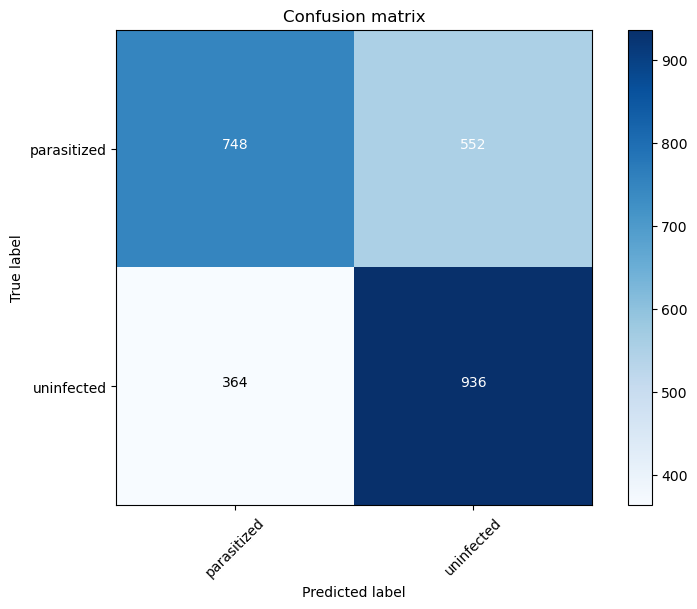

In [47]:
plot_confusion_matrix(cm, classes)

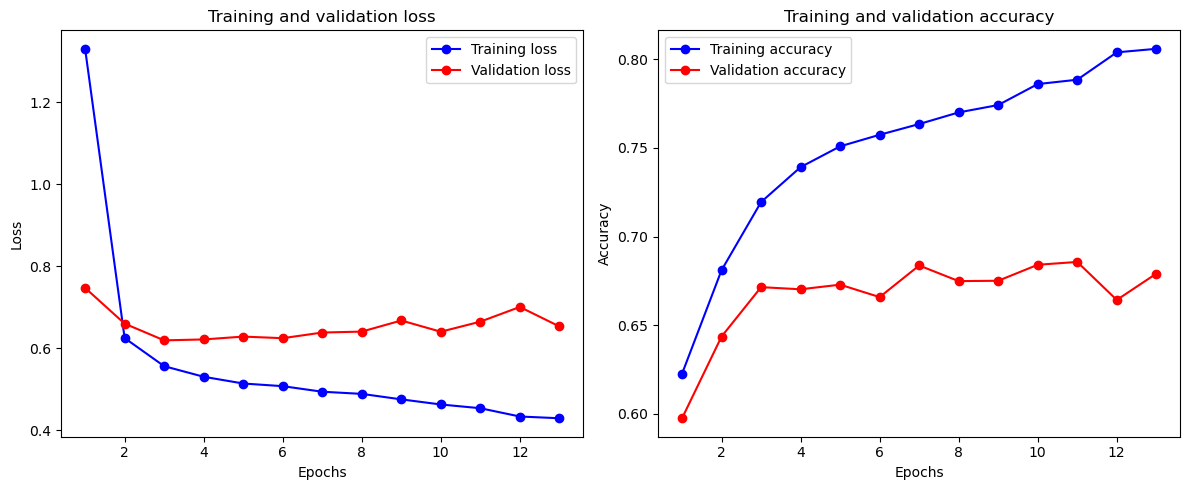

In [48]:
plot_history(history)

In [49]:
model_bn = Sequential()

# Input Layer
model_bn.add(Conv2D(16, (3, 3), padding='valid', input_shape=(image_size, image_size, channels), kernel_regularizer=L2(0.01)))
model_bn.add(BatchNormalization())
model_bn.add(LeakyReLU(alpha=0.01))
model_bn.add(MaxPooling2D(pool_size=(2,2)))
model_bn.add(Dropout(0.2))

# Bloack 1 
model_bn.add(Conv2D(64,(3,3), kernel_regularizer=L2(0.01)))
model_bn.add(BatchNormalization())
model_bn.add(LeakyReLU(alpha=0.01))
model_bn.add(MaxPooling2D(pool_size=(2,2)))
model_bn.add(Dropout(0.2))

# Fully Connected layers 
model_bn.add(Flatten())
model_bn.add(Dense(64,activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(LeakyReLU(alpha=0.01))
model_bn.add(Dropout(0.2))

# Output layer
model_bn.add(Dense(2,activation='softmax'))

In [50]:
model_bn.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model_bn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 16)     64        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 126, 126, 16)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 63, 63, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)       

In [51]:
# Define callbacks
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

In [52]:
history_bn = model_bn.fit(train_generator,
                          validation_data=val_generator,
                          callbacks=callbacks,
                          epochs = 100
                         )

Epoch 1/100
555/555 [==============================] - 67s 120ms/step - loss: 0.6152 - accuracy: 0.7766 - val_loss: 0.6274 - val_accuracy: 0.6659 - lr: 0.0010
Epoch 2/100
555/555 [==============================] - 65s 116ms/step - loss: 0.2704 - accuracy: 0.9124 - val_loss: 0.6331 - val_accuracy: 0.7348 - lr: 0.0010
Epoch 3/100
555/555 [==============================] - 65s 118ms/step - loss: 0.2197 - accuracy: 0.9320 - val_loss: 0.3434 - val_accuracy: 0.8407 - lr: 0.0010
Epoch 4/100
555/555 [==============================] - 64s 115ms/step - loss: 0.1914 - accuracy: 0.9368 - val_loss: 0.2544 - val_accuracy: 0.8986 - lr: 0.0010
Epoch 5/100
555/555 [==============================] - 59s 106ms/step - loss: 0.1673 - accuracy: 0.9454 - val_loss: 0.2605 - val_accuracy: 0.9163 - lr: 0.0010
Epoch 6/100
555/555 [==============================] - 60s 108ms/step - loss: 0.1617 - accuracy: 0.9458 - val_loss: 0.1820 - val_accuracy: 0.9501 - lr: 0.0010
Epoch 7/100
555/555 [=========================

In [53]:
result = model_bn.predict(test_generator, batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

In [54]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1300
           1       0.95      0.98      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



In [55]:
classes = list(train_generator.class_indices.keys())

Confusion matrix, without normalization


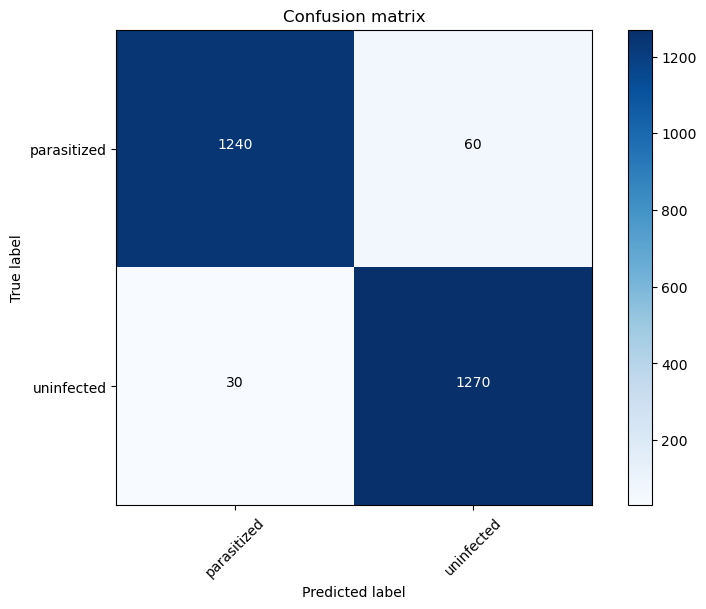

In [56]:
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, classes)

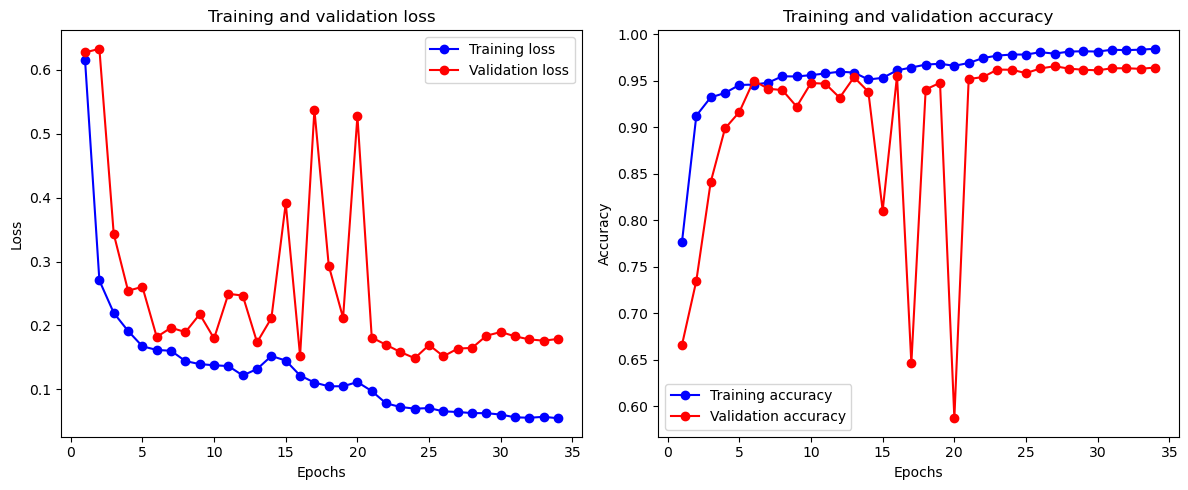

In [57]:
plot_history(history_bn)